<a href="https://colab.research.google.com/github/AmadorAreth/Data-Science/blob/main/TP1/((Amador))_03_Introducci%C3%B3n_al_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje profundo - Sesión 3  🧠**

> **Descripción:** Cuaderno de contenidos del módulo de aprendizaje profundo para el Dimplomado en Ciencia de Datos de la ENES UNAM León, 2024. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [ferro@cimat.mx](mailto:ferro@cimat.mx)


## Contenido

### Sección I

1. Overfitting vs. Underfitting
2. Regularización:
    - Dropout
    - Early Stopping

### Sección II

3. Problemas de regresión

### Sección III

4. Problemas de clasificación

## **Sección I**

### **IMPORTANTE**

El contenido de esta sección ha sido descrito en su totalidad a través de la presentación.

Conviene revisar el material que puedes encontrar en el [repositorio](https://github.com/RodolfoFerro/modulo-deep-learning).

### **Ejemplo de Early Stopping**

In [ ]:
import tensorflow as tf
import numpy as np


# Sample data (XOR)
x = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
y = np.array([0, 1, 1, 0])


# Creates the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6)

model.compile(optimizer=optimizer, loss=loss, metrics=[loss])

In [ ]:
# Create a callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(x, y, epochs=1000, callbacks=[callback])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2566 - mean_squared_error: 0.2566
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - loss: 0.2556 - mean_squared_error: 0.2556
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2548 - mean_squared_error: 0.2548
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2542 - mean_squared_error: 0.2542
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2538 - mean_squared_error: 0.2538
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2534 - mean_squared_error: 0.2534
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2532 - mean_squared_error: 0.2532
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2530 - mean_squared_error: 0.2530
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2528 - mean_squared_error: 0.2528
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2526 - mean_squared_error: 0.2526
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/ste

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

## **Sección II: Regresión lineal 01**

Resolveremos este primer ejercicio creando una red neuronal sencilla con datos sintéticos.

In [ ]:
import numpy as np

x = np.linspace(0, 100, 101)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
y = x + 10 * np.random.random((len(x)))
y

array([  1.95555397,   2.40514056,   2.5908271 ,  12.10750129,
         8.36906794,   9.46956619,   8.64111817,  11.79717684,
        14.43183975,  14.8869413 ,  10.62938132,  20.46093671,
        18.93957969,  16.88279091,  22.8622335 ,  23.09294493,
        25.3487485 ,  22.60473155,  21.75123302,  26.23653678,
        20.61387572,  24.90540392,  31.13304527,  29.87770241,
        33.42287403,  28.28120689,  30.23215521,  31.70302009,
        32.03723038,  38.6771419 ,  33.48353367,  31.36022752,
        36.45870745,  35.67393375,  36.95782658,  37.79760953,
        38.75798467,  39.00799058,  47.07522829,  46.37167174,
        49.63743499,  41.28240586,  51.43440343,  44.97131835,
        47.3574023 ,  49.358682  ,  53.05458337,  48.0897756 ,
        49.50968503,  53.94970168,  54.49307355,  56.47089573,
        55.76004154,  54.46484105,  62.13047952,  55.66646896,
        56.2571017 ,  63.53688606,  64.77908351,  59.29306515,
        60.48831145,  68.36134024,  65.57187244,  64.91

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

Por la simplicidad de los datos, podemos intentar realizar el ajuste de una recta, por lo que una simple neurona artificial bastará para modelar la ecuación $y=mx+b$.

El peso entrenado corresponderá a la pendiente $m$ de la ecuación y el _bias_ al valor de intersección $b$.

***NOTAS:***

**model.add(tf.keras.layers.Input([1]))** ---> capa de entrada nos funciona para especificar al modelo de que tamaño es la dimensión de los datos de entrada.

En escencia es de tamaño 1 es decir, un dato de entrada --> variable x por tanto esto deberia de devolver un dato de salida y es decir un **model.add(None)** para ello hay que agregar una capa densa en **(None) tf.Dense(1)** de una sola neurona y especificando la función de activación. quedando de la siguiente manera:

*   **model.add(tf.keras.layers.Dense(1, activation='Linear'))**

En el tipo de activación se espera activar una función que pueda satifacer y por tanto aproximarse a los comportamientos de los datos.



---



*   model = tf.keras.Sequential()
*   **model.add(tf.keras.layers.Input([1])**) ->  CAPA DE ENTRADA, ([1]) --> EL 1 indica el numero de variables de entrada este 1 se pone de acuerdo al presente ejercicio pero se pueden establecer parametros como: x1, x1, x3 hubiese sido 3 en su caso.
*   model.add(tf.keras.layers.Dense(1, activation='linear'))-> CAPA DE SALIDA

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])
model.add(tf.keras.layers.Dense(4, activation='linear'))
model.add(tf.keras.layers.Dense(1, activation='linear')) # Hint: Output layer is Dense(1) w/linear activation

In [ ]:
#model.get_weights()

In [ ]:
model.predict(np.array([2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[-1.1554978]], dtype=float32)

***NOTAS:***

En esta primera demostración del modelo con codigo en la predición:


*   **model.predict(np.array([2]))**

  Nos arroja un array es decir que un dato de entrada de variable x = 2 nos predice con -0.5964942 sin embargo dentro de la vizualización previa al entrenamiento vemos que el valor (x) = 2 en el grafico tiene valor de de salida (y) de 3.66282

  Por lo observado las predicciones no estan cerca de ser similares, no obtante ya tenemos un primer modelo de predicción. En este punto solo faltaria entrenar al modelo. y para ello recurrimos alos siguientes subtemas: optimización y función de perdida.



*   loss = tf.keras.losses.MeanSquaredError() ---> esta función se encuentra en keras

---

  **ojo:** el array de la predicción nos arrojo un dato de salida aleatorio por lo que los valores al momento de volver a ejecutar no seran los mismos en cada prueba de presición del modelo.

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

**Para estas funciones es necesario considerar varios puntos:**



*   Para la función de perdida el MeanSquaredError() es una opción, sin embargo, hay mas funciones para mejorar el modelo de predicción.
*   Para la función de optimización existe SGD y Adam, en el caso de SGD no es necesario especificar el larning_rate ya que ya viene predeterminado en keras.

####**Ojo:**
**En este punto ya podemos ir ajustando diferentes opciones de error y optimización para ir mejorando el modelo**

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4) # Try SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1)

> **¿Qué es ADAM?** $\rightarrow$ https://www.geeksforgeeks.org/adam-optimizer/

In [ ]:
# TODO: Add optimizer and loss to model compilation
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

####Ojo:
Previo a realizar el siguiente codigo para entrenar el modelo hay una observación de acuerdo a estos parametros; En **history = model.fit(x, y, epochs=100)** al momento de observar el error donde deberia de disminuir , ferro analizó que el error se exponenció a un nivel ya no registrable dentro de la memoria con lo que con eso es suficiente para observar otros detalles en el modelo y poder realizar nuevos ajustes y obtengamos como respuesta positiva una tendencia a la baja del error y no lo contrario.

Dentro del reajuste del modelo, se menciona que la función de MeanSquaredError() esta bien debido a que estamos realizando un modelo de regresión y este parametro es bueno para tales caracteristicas, por lo que procede a realizar otras observaciones.

***Dentro de estas observaciones se reajustó la función de optimización al introducir manualmente en el codigo el learning_rate*** experimentando un learning_rate a la baja al introducir indices mas pequeños como el siguiente:

**optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6)**

El indice empezó a la -1 luego , -2 y llego hasta el -6 haciendo más optímo la disminución del error a través de este ajuste de parametros.



> Puede ser contraproducente que si configuramos un learning_rate más bajo el error empiece a aumentar en vez de bajar.



In [ ]:
history = model.fit(x, y, epochs=80)

Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4684.3975 - mean_squared_error: 4420.6909
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7124 - mean_squared_error: 13.9067  
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.7620 - mean_squared_error: 15.3364 
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0595 - mean_squared_error: 13.7131 
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0607 - mean_squared_error: 20.7150 
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.2442 - mean_squared_error: 22.6729 
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6287 - mean_squared_error: 14.9539 
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0947 - mean_squared_error: 14.1337 
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.6975 - mean_squared_error: 13.6626
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.7677 - mean_squared_error: 15.2948 
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

### **Evaluación del modelo**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# MSE
y_pred_model = model.predict(x)
print("MSE:", mean_squared_error(y, y_pred_model))

# R2
print("R^2:", r2_score(y, y_pred_model))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE: 13.965389459511993
R^2: 0.9834812703008357


#####Ajuste del modelo.

Estos dos últimos codigos nos ayudan a poder copilar todo y representar como el modelo se ajusta a los datos , en este caso es una linea recta que define segun el modelo el ajuste hacia los datos, no obstante se menciona que a pesar de que mas o menos se ajusto este modelo a estos criteros es necesario tener un parametro para ver que tan bueno se ajusto el modelo a esta linea , para que la linea pueda profundizar aun más entre los datos y no tener cierto sesgo se recurre a la sig codigo para evaluación del modelo:

Para ello recuriremos al ;

*   **MSE (Error cuadratico medio)**
*   **R cuadrada (coeficiente de determinación)** ---> *entre más cercano este a 1 esta variable, quiere decir que es mejor el ajuste del modelo.*



> - **Métricas de regresión:** https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
> - **Coeficiente de determinación:** https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
w, b = model.get_weights()
w, b = w[0][0], b[0]
w, b

ValueError: too many values to unpack (expected 2)

**NOTAS:**

*   **w, b = model.get_weights()**
*   **w, b = w[0][0], b[0]**
*   **w, b**

Este codigo nos devuelve el valor weight que es la entrada (la pendiente) y el baias (punto de intersección).



####Ajuste más optimo el modelo (Parte 2):

1.   Validar si la función de perdida **loss = tf.keras.losses.MeanSquaredError()** es la ideal
2.   **Ajustar el learning_rate** a un indice menor. **e intercalar entre SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1) Y JUGAR CON LOS INDICES**, en SGD ferro incremento el indice empezando de -1 a -2, -3, etc. sin embargo si se pasa se este indice el error incrementa en vez de disminuir, por el lado contrario con ADAM se empezó de -5, -3, -2, etc. y el error bajo --> esta opción la realizó disminuyendo el numero de epocas. lado contrario del SGD.
3.  **Aumentar las epocas de entrenamiento.**

**Puntos a considerar:**

***Al hacer estos ajustes hay que cotejarlo y ejecutar todas las lineas de codigo para poder vizualizar finalmente como se ajusta el modelo a los datos.***


### **Reconstrucción del modelo**

Tambien se mencionó que el y_reconstructed = x * w + b puede tomar la estructura del modelo lineal al cambiarle la variable w por b;
*   **y_reconstructed = x * m + b **



In [ ]:
y_reconstructed = x * w + b

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_reconstructed, mode='lines', name='Modelo ajustado')
)

fig.show()

###SOLUCIÓN DEL MODELO CON PARAMETROS ANTERIORES:

**MODELO ACTUAL Y PARAMETROS 🇰**

En el modelo anterior tuvimos los siguientes parametros:


***Se utilizó una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Una sola variable de salida con función de activación linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una función de perdida de MSA y un Learning rate SGD de 1e-6***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6)

***Se entrenó por 100 epocas:***

* history = model.fit(x, y, epochs=100)

**Dentro de la vizualización de los parametros de medición se optuvo con estas funciones anterioes lo siguientes:**

*   MSE: 85.56142869850959
*   R^2: 0.8989132886425303

MODELO:

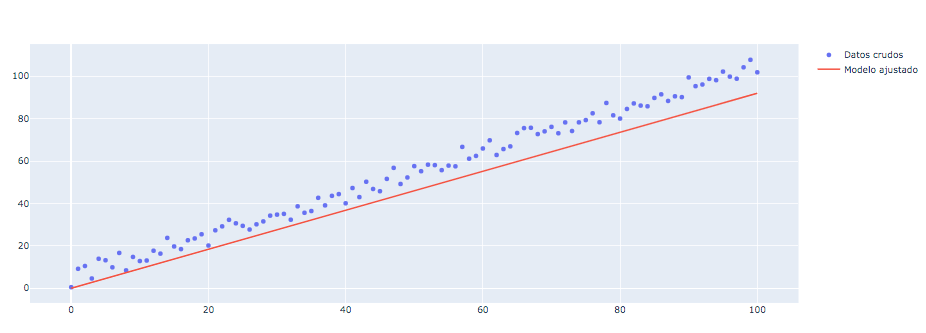

Comentarios:

De acuerdo a estos parametros podemos deducir que el actual modelo presenta un entrenamiento y predicción poco eficiente ya que la representatividad de los datos a traves de la linea de intersección de estos esta sesgada.




###SOLUCIÓN PROPUESTA AL MODELO: ⚛

**PARAMETROS 🇰**

En el modelo anterior tuvimos los siguientes parametros:


***Se utilizó una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Se AGREGARON 4 neuronas en una sola capa oculta***

* model.add(tf.keras.layers.Dense(4, activation='linear'))

***Una sola variable de salida con función de activación linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una función de perdida de MSA y un Learning rate SGD de 1e-4***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)

***Se entrenó por 80 epocas:***

* history = model.fit(x, y, epochs=80)

**Dentro de la vizualización de los parametros de medición se obtuvo lo siguiente:**

*   MSE: 13.965389459511993
*   R^2: 0.9834812703008357

MODELO:

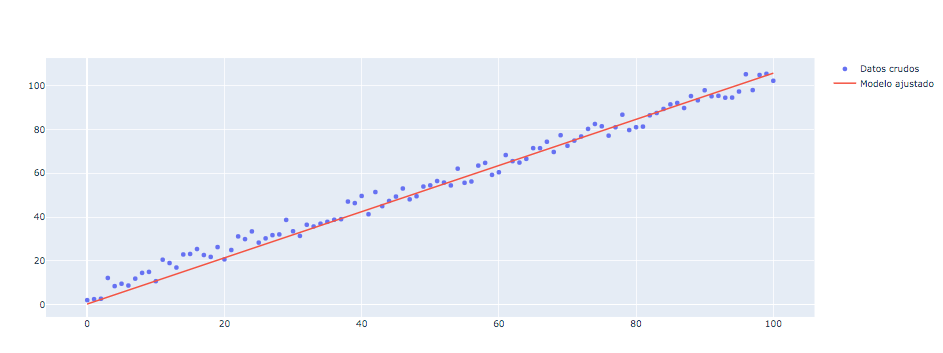

**Comentarios:**
Como podemos observar estos parametros a comparación de la situación anterior son mejores debido a un mejor ajuste de la intersección en la linea hacia el comportamiento de los datos, no obstante seria necesario experimentar con otros parametros para hacer un ajuste aun más optimo, lo inusual de ello fue que en el MSA se optuvo una ponderación de 13 lado contrario del modelo no tan eficiente con parametro de 87 aprox. en R^2 si hubo una mayor presición debido a que obtuvimos una poneración arriba del 95 en comparación a puntos 80 del anterior modelo.

---

## **Regresión 02**

Ahora vamos a resolver un problema de regresión no necesariamente lineal.

In [ ]:
import numpy as np

x = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
y = np.sin(x) + 0.5 * np.random.randn( len(x))

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

En este vizualización de datos aleatorios como modo de ejemplo, ferro nos hace la prgunta principal, como podemos crear un red neuronal que se ajuste a este tipo de comportamiento de los datos de la función en curva.

### **Modelo**

Una vez que se preseció el ondefiften para poder hacer un mejor modelo recurrimos a las capas ocultas:



*   **model.add(tf.keras.layers.Dense(4, activation='linear'))**

Ferro cambio las capas ocultas al modificar la activación 'agregando funciones no lineales como tanh y modificando las capas es decir:



*   **model.add(tf.keras.layers.Dense(64, activation='tanh'))**
*   **model.add(tf.keras.layers.Dense(128, activation='tahn'))**
*   **model.add(tf.keras.layers.Dense(64, activation='tanh'))**









In [ ]:
import tensorflow as tf

#opcional
 #fijar valores random utilizando una semilla --> tf.random.set_seed(42) ó np.random.seed(42) --> lo valores de los modelos cambian por los pesos.

# TODO: Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])


# TODO: Create at least 1 hidden layer
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dense(128, activation='tanh')) #CAPAS OCULTAS ADICIONALES
model.add(tf.keras.layers.Dense(128, activation='tanh'))

model.add(tf.keras.layers.Dense(1, activation='linear')) # Hint: Output layer is Dense(1) w/linear activation

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) # Try Adam(learning_rate=1e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.8238 - mean_squared_error: 0.8249
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8272 - mean_squared_error: 0.8278
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7357 - mean_squared_error: 0.7351
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6804 - mean_squared_error: 0.6799
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6227 - mean_squared_error: 0.6223
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6321 - mean_squared_error: 0.6315
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6852 - mean_squared_error: 0.6847
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6505 - mean_squared_error: 0.6506
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6084 - mean_squared_error: 0.6089
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6280 - mean_squared_error: 0.6279 
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

### **Reconstrucción del modelo**

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

###SOLUCIÓN DE MODELO CON PARAMETROS ANTERIORES:

**MODELO ACTUAL Y PARAMETROS 🇰**

En el modelo anterior tuvimos los siguientes parametros:


***Se utilizó una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Una sola variable de salida con función de activación linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una función de perdida de MSA y un Learning rate ADAM de 1e-3***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

***Se entrenó por 200 epocas:***

* history = model.fit(x, y, epochs=200)

MODELO:



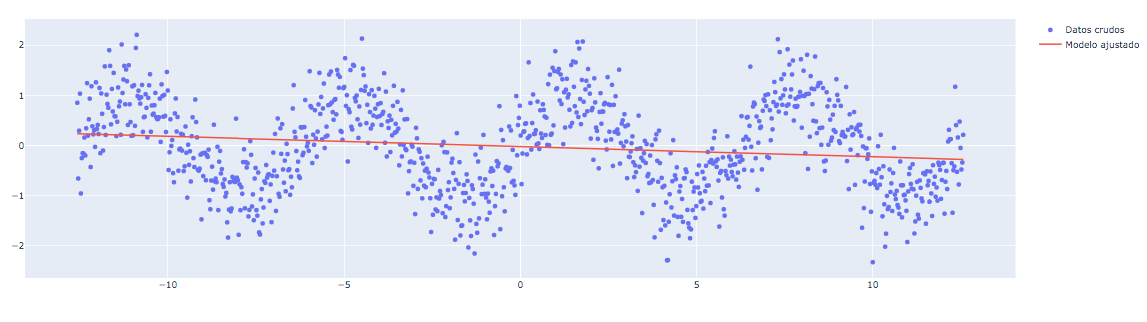


Comentarios:

La variable de salida con función de activación "linear" no fue suficiente debido a que el modelo presentó onderfifteen el cual NO ESTA BIEN ya que no esta ajustandose a todos los datos solo los pondera pero no los predice.

En este escenario se menciona que a pesar de agregar más capas densas en la función de activación, nos arroja que finalmente funciones que no saben reconocer datos no lineales por lo que recurre a configurar el tipo de acivación al agregar funciones no lineales entre las capss ocultas (intermedias) tipo: tanh

###**SOLUCIÓN PROPUESTA DEL MODELO** ⚛


---



**MODELO ACTUAL Y PARAMETROS 🇰**

En el modelo anterior tuvimos los siguientes parametros:


***Se utilizó una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***3 capas ocultas con 64,128, 64 neuronas con funciónes de activación tanh:***
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))
*   model.add(tf.keras.layers.Dense(128, activation='tahn'))
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))


***Una sola variable de salida con función de activación linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una función de perdida de MSA y un Learning rate ADAM de 1e-3***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

***Se entrenó por 150 epocas:***

* history = model.fit(x, y, epochs=150)

MODELO:


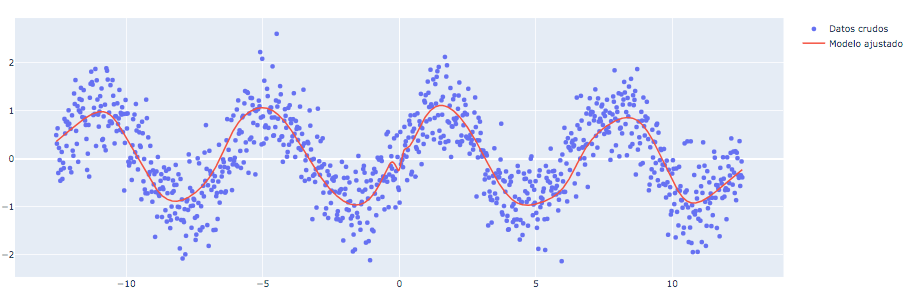



COMENTARIOS:

Se puede observar un mejor modelo a comparación del inicial, mejorando la precición en la represntatividad de los datos, no obstante es de prescindir que el modelo aun puede ser ajustado de tal manera que pueda acceder a una mayor presición, se intentaron realizar diferentes funciones de activación como sigmoid y otras que investigando eran de ayuda para el modelo, no obstante cotejando con la clase y probando el mejor ajuste de los datos fue con la activación tanh, solo era necesario agregar las capas presentes para que este pueda identificar patrones y su aprendizaje sea mejor.

otro modelo con 3 capas intermedias.





RECOMENDACIONES FERRO:



1.   Jugar con las capas adicionales.
2.   Jugar con el numero de neuronas.
3.   Cambiar la función de activación --->linear, relu, tanh, softmax, sigmoid etc...n.





<center>
    *********
</center>

## **Sección III – Ejercicio: Clasificación 01**

Para este problema utilizaremos un dataset sintético ya conocido:

Clasificación binaria, es decir ver si algo pertenece a una clase o a otra clase.

In [ ]:
from sklearn.datasets import make_circles
import numpy as np


# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
import pandas as pd


circles = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "label":y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
#OPCIÓN DE x12 y x22 al cuadrado

circles['x12'] = circles['x1'] ** 2
circles['x22'] = circles['x2'] ** 2
circles.head()

,x1,x2,label,x12,x22
0,0.754246,0.231481,1,0.568887,0.053583
1,-0.756159,0.153259,1,0.571776,0.023488
2,-0.815392,0.173282,1,0.664864,0.030027
3,-0.393731,0.692883,1,0.155024,0.480087
4,0.442208,-0.896723,0,0.195548,0.804113


In [ ]:
# Verify number of labels
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=circles['label'].astype(str) # Discretize the color palette
)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


# TODO: Create the model using the Sequential API
# Hint - You can try:

#  - Input(2)
#  - Hidden layers - tanh
#  - Output layer(1) - sigmoid

model = tf.keras.Sequential()

#model.add(tf.keras.layers.Input([2]))
#model.add(tf.keras.layers.Dense(1, activation='tanh'))
#model.add(tf.keras.layers.Dense(2, activation='tanh'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#2do metodo ferro --> con valores de entrada cuadraticos.
model.add(tf.keras.layers.Input([2]))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

solución :

*   model.add(tf.keras.layers.Input([2]))
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))
*   model.add(tf.keras.layers.Dense(5, activation='tanh'))
*   model.add(tf.keras.layers.Dense(1, activation='sigmoid'))




### **Optimizador y función de pérdida**

$$ \mathrm{Binary Crossentropy}=-\frac{1}{N}\cdot\sum_{i=1}^N \left[y_i \log (\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right] $$


In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3) # Try Adam(learning_rate=3e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_172 (Dense)                    │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
#2da forma de resolición por valores al cuadrado
x2 = circles[['x12', 'x22']].values

In [ ]:
#history = model.fit(x, y, epochs=100)
#2da opción :
history = model.fit(x2, y, epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5203 - loss: 0.6934
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4997 - loss: 0.6912 
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5053 - loss: 0.6882 
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4986 - loss: 0.6843 
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 0.6795 
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5408 - loss: 0.6710 
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.6634 
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8928 - loss: 0.6534 
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9875 - loss: 0.6416 
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.6283 
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9978 - loss: 0.6123 
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
import plotly.express as px


losses = history.history['accuracy']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Accuracy')
)
fig.show()

### **Evaluación del modelo**

In [ ]:
#model.evaluate(x, y)
model.evaluate(x2, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0111


[0.011025200597941875, 1.0]

[0.05394923686981201, 1.0] --> estos parametros de arriba indica, el error final que queda y la presición.

In [ ]:
#y_pred = model.predict(x)
y_pred = model.predict(x2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
def binarize_output(y_pred, threshold=0.5):
    return np.array([1 if x > threshold else 0 for x in y_pred])

threshold=0.5 --> el umbral lo definimos de acuerdo al contexto del analisis, es decir podemos definir si apartir de cierto numero sera 1 o 0. como orden de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_bin = binarize_output(y_pred)
print("Accuracy score:", accuracy_score(y, y_pred_bin))

Accuracy score: 1.0


print("Accuracy score:", accuracy_score(y, y_pred_bin)) --> este accuracy nos define un parametro sencillo para medir la precición de clasficiación, es decir si los parametros dan (0,0) ó (1,1) esta por buen camino, pero si por el contrario nos da (1,0) ó (0,1) puede ser una predicción impresisa.

es decir y & y_pred , son salidas, la primera original y la segunda salida predicha.

> - **Métricas de clasificación:** https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=y_pred_bin.flatten().astype(str) # Discretize the color palette
)
fig.show()

---

SE RESUELVE EL PROBLEMA RESOLVIENDO INGENIERIA DE CARACTERISTICAS DE LOS DATOS. EJEMPLO X12, X22 --> ELEVACIÓN AL CUADRADO.




*   A menor cantidad de capas ocultas (neuronas) es recomendable entrenar el modelo con un numero mayor de epocas.


*   Cuando se elevan las variables de entarda al cuadrado , el vizualziar estos datos obtenemos una dimensión lineal por lo que ferro sugiere que podemos experimentar por eliminar las capas densas y dejar solo la sigmoide debido a la transformación de los datos. En este escenario hay que considerar agregar al modelo y funciones los datos transformados.







##**SOLUCIÓN PROPUESTA Y PARAMETROS USADOS** ⚛


**Se usaron dos variables de entrada, una capa oculta con 1 neurona de activación tahn y una capa de salida con función sigmoid:**

*   model.add(tf.keras.layers.Input([2]))
*   model.add(tf.keras.layers.Dense(1, activation='tanh'))
*   model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

**Historial de entrenamiento: **
*   150 epocas

**Evalucación del modelo:**
*   model.evaluate(x2, y) --> [0.011025200597941875, 1.0]

**Acurasy Score:**
*   Accuracy score: 1.0

**Comentarios:**

Dada las caracteristicas del modelo durante la configuración se hizo una pequeña ingenieria de los datos al convertilos a valores cuadráticos, a la par de que se optó por funciones tanh y sigmoid que siendo valoradas con un historial de 150 epocas vastó para poder tener una valoreación de accurasy de 1.0 valor maximo de presición.

Teniendo como respuesta este tipo de error y accuracy :

Modelo:

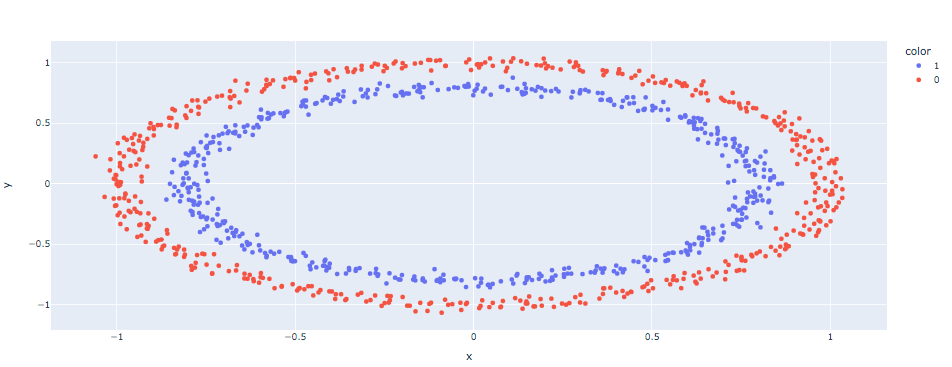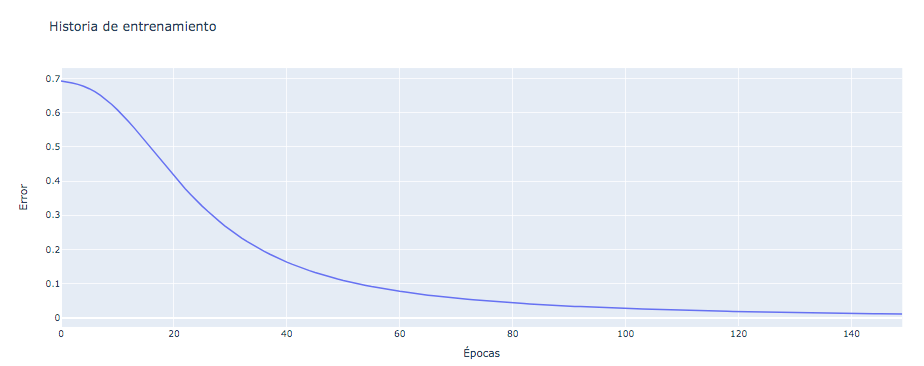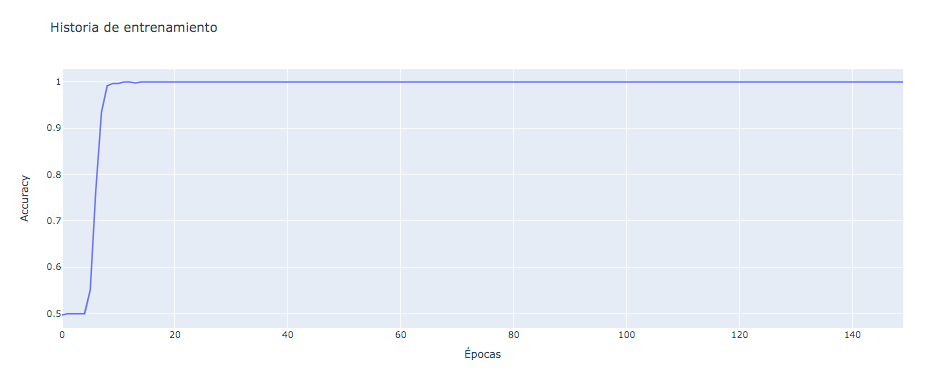



## **Clasificación 02**

Ejercicio de clasificación --> multiclase. / Retos de clasificación con imagenes.

Ahora utilizaremos un conjunto de datos un poco más complejo: el **MNIST dataset**.

El dataset está compuesto por imágenes de 28x28 pixeles, que contienen un conjunto de dígitos en 10 categorías.

Los datos de MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [44]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [45]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 128 255 255 255 191  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 255 255 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 191 255 255 255 255 2

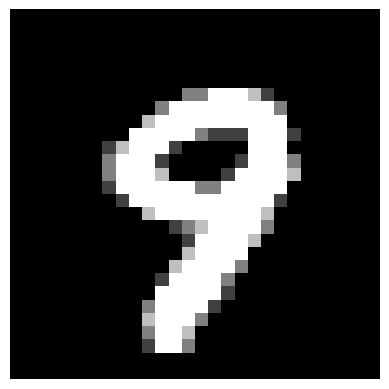

In [46]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [ ]:
#ESTIRAR
#training_images[img_index].flatten()

### **Preparación de los datos**

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **estandarización**.

In [47]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 9
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         

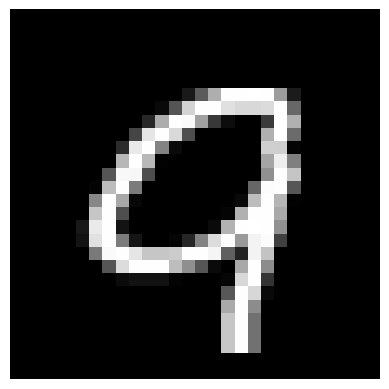

In [48]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [49]:
training_images[0].shape

(28, 28)

### **Modelo**



**model.add(tf.keras.layers.Flatten())**
[28, 28] -> [...] si tenemos un vector de 28 x 28 cual seria la dimensión de ese vector? es decir cuantos elementos de entrada va a tener?

RESPUESTA = La multiplicación de ellos. por tanto seria un flatten que estiraria dicho victor y nos daria un vector de 784 pixeles. todos en un vector

Para la capa de salida ya no tenemos solamente dos clases por tanto se haacen las sig. observaciones

*   Tendremos una función softmax --> con 10 salidas para que mapie cada una de las clases a valores entre 0 y 1 y se debe observar que clase tiene la probabilidad mas alta.






In [50]:
# TODO: Create the model using the Sequential API
# Hint - You can try:
#  - Flatten()
#  - Hidden layers - relu
#  - Output layer(10) - softmax

model = tf.keras.models.Sequential()

#[28, 28] -> [784]
model.add(tf.keras.layers.Flatten())

# [
#   0--> [0,1]
#   1
#   ...
#   9
# ]
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))



> **Softmax Activation Function: Everything You Need to Know** - https://www.pinecone.io/learn/softmax-activation/


### **Optimizador y función de pérdida**

In [51]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD() # Try SGD()

In [52]:
# TODO: Integrate everything here!
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

### **Entrenamiento del modelo**

Para entrenar el modelo, simplemente utilizamos el método `.fit()` del modelo.

In [53]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5848 - loss: 1.3092
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9030 - loss: 0.3339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9236 - loss: 0.2629
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.2284
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9410 - loss: 0.2007
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9525 - loss: 0.1595
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9564 - loss: 0.1487
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9591 - loss: 0.1390
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1339


In [54]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (32, 32)                    │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (32, 64)                    │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (32, 10)                    │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,644 (115.80 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


> **Pregunta clave:** ¿Qué sucede con la historia de entrenamiento?

In [55]:
import plotly.express as px


seen = 'accuracy' # or 'loss'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y=seen.capitalize())
)
fig.show()

### Evaluación del modelo

In [56]:
model.evaluate(test_images, test_labels)

#.    ERROR -------------  ACCURACY

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1555


[0.13856388628482819, 0.957099974155426]

### Predicción


Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: 1


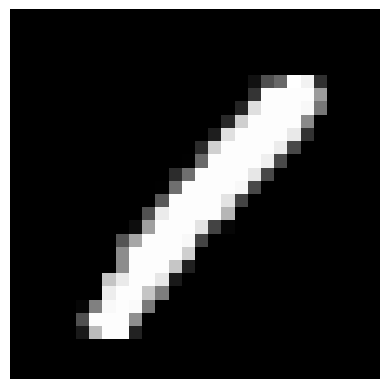

In [57]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print('Label:', test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print('Prediction:', np.argmax(prediction))

In [58]:
prediction

array([[7.1371836e-08, 9.9681962e-01, 1.0385260e-04, 1.2517443e-05, 6.2594347e-04, 6.8129440e-05, 2.2386168e-06, 1.1241600e-03, 1.2429819e-03, 3.9770751e-07]], dtype=float32)

> **Para resolver el reto es:** Mejorar el accuracy obtenido en la clase.

**Puedes explorar:**
- El número de capas.
- Las épocas de entrenamiento.
- Las funciones de activación.
- Investigar otras capas.

In [ ]:
#training_imagines.shape

 # (R, G, B) (3000, 28, 28)

NameError: name 'training_imagines' is not defined

##SOLUCIÓN PROPUESTA Y PARAMETROS USADOS ⚛

Dentro de este modelo con los parametros anteriores lo unico que se modifico o bien agrego fue lo siguiente:

***Se usaron dos variables de entrada, 3 capas ocultas con 32 , 64, 32 neuronas de activación respectivamente con activación relu y una capa de salida con función softmax:***


*   model = tf.keras.models.Sequential()
*   model.add(tf.keras.layers.Flatten())
*   model.add(tf.keras.layers.Dense(32, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(64, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(32, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


**Historial de entrenamiento:**

*   10 epocas

**Optimizador**

* Learning_rate ADAM con valor predeterminado


**Evaluación del modelo:**

model.evaluate(test_images, test_labels) --> [0.13856388628482819, 0.957099974155426]

**Comentarios:**
Dado las caractetisticas, se puede deducir que el modelo mejoró con un nivel de precisión arriba del 95%, sin embargo considero que aún se pueden hacer ajustes para utilizar menos capas ocultas. Se estuvo intentando y tambien se observaron con solo una capa oculta pero incrementando el numero de neuronas y de epocas.

--------

> Contenido creado por **Rodolfo Ferro**, 2024. <br>
> Para cualquier retroalimentación, puedes contactarme a través del correo [ferro@cimat.mx](mailto:ferro@cimat.mx).